In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [2]:
# Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df, on ="city")

# Display the data table for preview
combined_data_df = combined_data_df [["city", "date", "fare", "ride_id", "driver_count", "type"]]
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

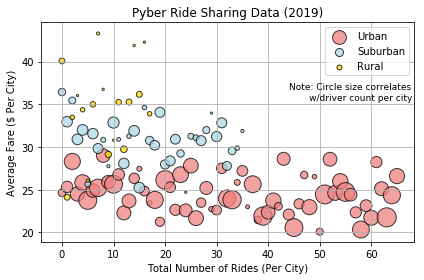

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = combined_data_df.loc[combined_data_df["type"] == "Urban",:]
urban_cities_mean = urban_cities.groupby(["city"]).mean()

x_urban = urban_cities["city"].value_counts()
y_urban = urban_cities_mean["fare"]
z_urban = urban_cities_mean["driver_count"]
x_urban_axis = np.arange(0, len(x_urban), 1)

suburban_cities =combined_data_df.loc[combined_data_df["type"]=="Suburban",:]
suburban_cities_mean = suburban_cities.groupby(["city"]).mean()

x_suburban = suburban_cities["city"].value_counts()
y_suburban = suburban_cities_mean["fare"]
z_suburban = suburban_cities_mean["driver_count"]
x_suburban_axis = np.arange(0, len(x_suburban), 1)

rural_cities = combined_data_df.loc[combined_data_df["type"] == "Rural",:]
rural_cities_mean = rural_cities.groupby(["city"]).mean()

x_rural = rural_cities["city"].value_counts()
y_rural = rural_cities_mean["fare"]
z_rural = rural_cities_mean["driver_count"]
x_rural_axis = np.arange(0, len(x_rural), 1)

# Build the scatter plots for each city types
urban_plot =plt.scatter(x_urban_axis, y_urban, s=z_urban*5,
            marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)

suburban_plot =plt.scatter(x_suburban_axis, y_suburban, s=z_suburban*5,
            marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)

rural_plot =plt.scatter(x_rural_axis, y_rural, s=z_rural*5,
            marker="o", facecolors="gold", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($ Per City)")
plt.grid()
plt.tight_layout()
# Create a legend

plt.legend((urban_plot,suburban_plot,rural_plot), ("Urban", "Suburban", "Rural"))

# Incorporate a text label regarding circle size
plt.text(44, 35.5, "Note: Circle size correlates \n       w/driver count per city", fontsize=9)

# Save Figure
plt.savefig("pyber_bubble_plot.png")
           

## Total Fares by City Type

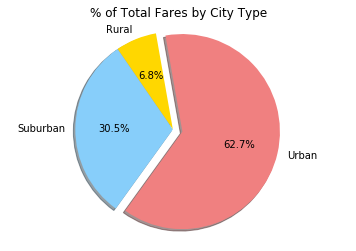

In [7]:
# Calculate Type Percents
total_fare_urban = combined_data_df.loc[combined_data_df["type"] == "Urban","fare"].sum()
total_fare_suburban = combined_data_df.loc[combined_data_df["type"] == "Suburban","fare"].sum()
total_fare_rural = combined_data_df.loc[combined_data_df["type"] == "Rural","fare"].sum()

city_type = ["Rural","Suburban", "Urban"]
total_fare = [total_fare_rural, total_fare_suburban, total_fare_urban]
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(total_fare, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
# Save Figureplt
plt.savefig("Total_Fares.png")

## Total Rides by City Type

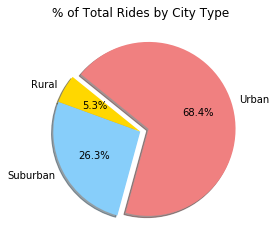

In [8]:
# Calculate Ride Percents
total_rides_urban = combined_data_df.loc[combined_data_df["type"] == "Urban","ride_id"].count()
total_rides_suburban = combined_data_df.loc[combined_data_df["type"] == "Suburban","ride_id"].count()
total_rides_rural = combined_data_df.loc[combined_data_df["type"] == "Rural","ride_id"].count()

city_type = ["Suburban","Urban", "Rural", ]
total_rides = [total_rides_suburban,total_rides_urban, total_rides_rural]
colors = ["lightskyblue", "lightcoral",  "gold"]
explode = (0,0.1,0)

# Build Pie Chart
plt.pie(total_rides, explode=explode, radius =1, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160, )
# plt.axes.s
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total_Rides.png")

## Total Drivers by City Type

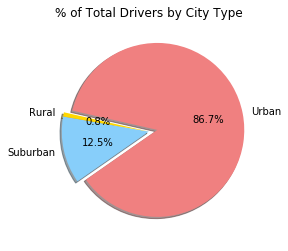

In [9]:
# Calculate Driver Percents
total_drivers_urban = combined_data_df.loc[combined_data_df["type"] == "Urban","driver_count"].sum()
total_drivers_suburban = combined_data_df.loc[combined_data_df["type"] == "Suburban","driver_count"].sum()
total_drivers_rural = combined_data_df.loc[combined_data_df["type"] == "Rural","driver_count"].sum()

city_type = ["Suburban","Urban","Rural"]
total_drivers = [total_drivers_suburban, total_drivers_urban, total_drivers_rural]
colors = ["lightskyblue", "lightcoral", "gold"]
explode = (0,0.1,0)
# Build Pie Charts
plt.pie(total_drivers, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Total_Drivers.png")

In [10]:
# Rural Areas had less drivers and riders of Pyber ride sharing, but no well-defined trend in relationship to average fare. 
  # This could possibly be explained by varying distances of rides in rural areas or the supply of drivers in rural areas.
    
# Most rides occur in the urban areas, which equals 68.4%, followed by suburban at 26.3%,
  #and the rural areas has the lowest percentage of rides 5.3%.
    
# Urban areas has a highest percentage of fares: 62.7%,  followed by suburban: 38.5% 
  #and rural areas has only 6.8% of total fares.   